In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets

torch.manual_seed(3)

In [2]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(
    n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4
)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

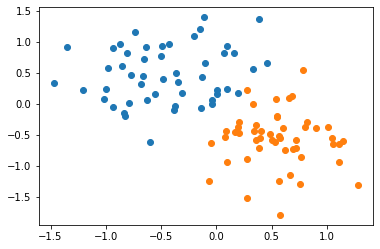

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])

In [4]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [5]:
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.7011, -0.5578]], requires_grad=True), Parameter containing:
tensor([-0.3029], requires_grad=True)]


In [6]:
[w, b] = model.parameters()
w1, w2 = w.view(2)


def getparams():
    return (w1.item(), w2.item(), b[0].item())

In [7]:
def scatterplot():
    plt.scatter(X[y == 0, 0], X[y == 0, 1])
    plt.scatter(X[y == 1, 0], X[y == 1, 1])

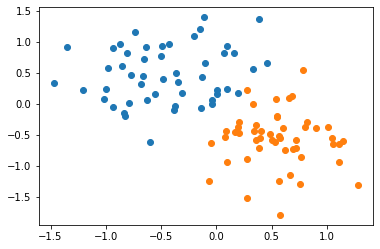

In [8]:
scatterplot()

In [9]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = getparams()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1 * x1 + b1) / -w2
    plt.plot(x1, x2, "r")
    scatterplot()

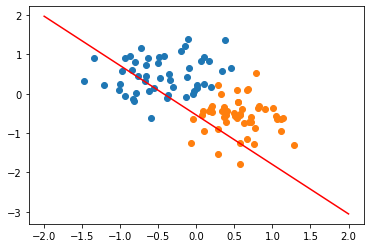

In [10]:
plot_fit("Inital Model")

In [11]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [12]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)

    loss = criterion(y_pred, y_data)
    if i % 100 == 0:
        print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 0.7542729377746582
epoch: 100 loss: 0.2729990482330322
epoch: 200 loss: 0.19155025482177734
epoch: 300 loss: 0.15598373115062714
epoch: 400 loss: 0.13517460227012634
epoch: 500 loss: 0.12115436792373657
epoch: 600 loss: 0.11088971793651581
epoch: 700 loss: 0.10295272618532181
epoch: 800 loss: 0.09657435119152069
epoch: 900 loss: 0.09129974991083145


Loss over time


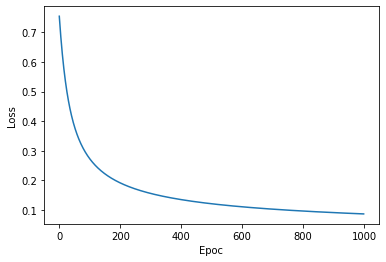

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoc")
print("Loss over time")

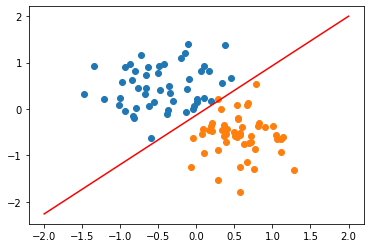

In [14]:
plot_fit("Trained Model")

red pp tensor([0.9993], grad_fn=<SigmoidBackward0>)
red predict class 1


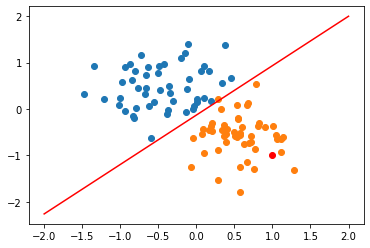

In [15]:
point1 = torch.Tensor([1.0, -1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], "ro")
plot_fit("prediction")
print(f"red pp {model.forward(point1)}")
print(f"red predict class {model.predict(point1)}")

black np tensor([0.0003], grad_fn=<SigmoidBackward0>)
black predict class 0


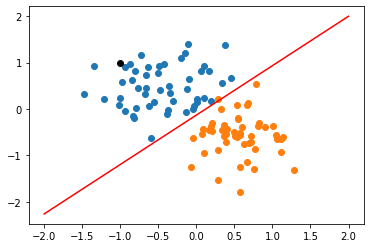

In [16]:
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point2.numpy()[0], point2.numpy()[1], "ko")
print(f"black np {model.forward(point2)}")
print(f"black predict class {model.predict(point2)}")
plot_fit("prediction")